# Shopping Trends Analysis

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel('/content/shopping_trends_updated.xlsx')

In [2]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [7]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

# 1. Distribution of Customer Ages

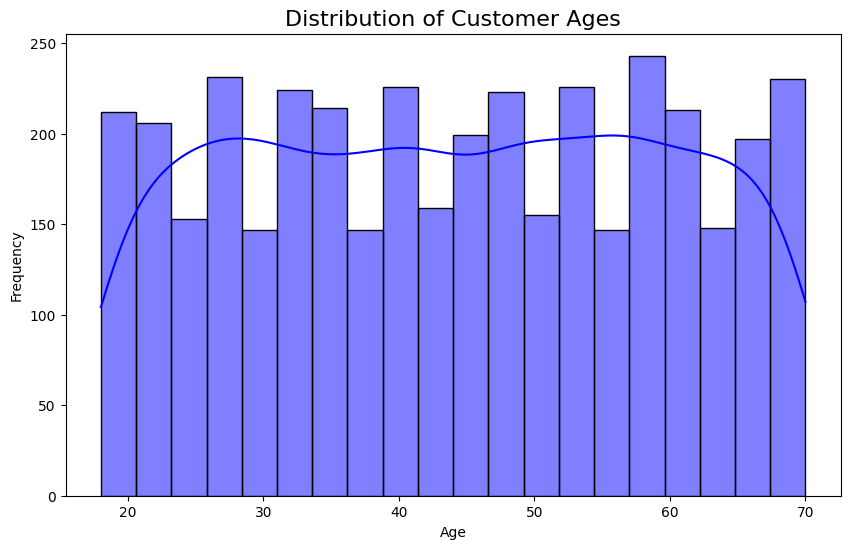

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='blue')
plt.title("Distribution of Customer Ages", fontsize=16)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# 2. Average Purchase Amount by Category

In [10]:
avg_purchase_category = df.groupby('Category')['Purchase Amount (USD)'].mean().sort_values(ascending=False)
print("Average Purchase Amount by Category:")
print(avg_purchase_category)

Average Purchase Amount by Category:
Category
Footwear       60.255426
Clothing       60.025331
Accessories    59.838710
Outerwear      57.172840
Name: Purchase Amount (USD), dtype: float64


# Visualize Average Purchase Amount by Category

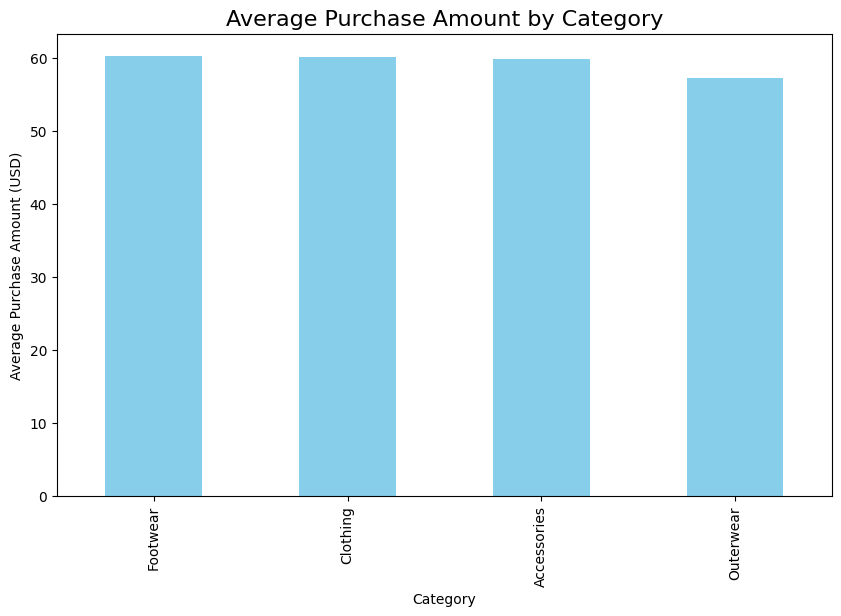

In [11]:
avg_purchase_category.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title("Average Purchase Amount by Category", fontsize=16)
plt.xlabel("Category")
plt.ylabel("Average Purchase Amount (USD)")
plt.show()

# 3. Gender with the Highest Number of Purchases

In [12]:
gender_purchases = df['Gender'].value_counts()
print("Number of Purchases by Gender:")
print(gender_purchases)

Number of Purchases by Gender:
Gender
Male      2652
Female    1248
Name: count, dtype: int64


# Visualize Gender Purchases

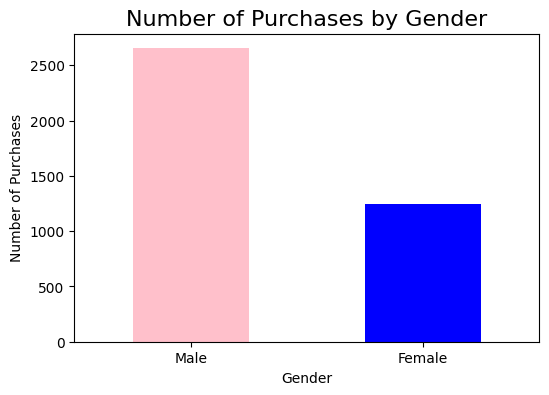

In [13]:
gender_purchases.plot(kind='bar', figsize=(6, 4), color=['pink', 'blue'])
plt.title("Number of Purchases by Gender", fontsize=16)
plt.xlabel("Gender")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=0)
plt.show()

# 4. Most Commonly Purchased Items in Each Category

In [14]:
most_common_items = df.groupby('Category')['Item Purchased'].apply(lambda x: x.mode()[0])
print("Most Commonly Purchased Items in Each Category:")
print(most_common_items)

Most Commonly Purchased Items in Each Category:
Category
Accessories    Jewelry
Clothing        Blouse
Footwear       Sandals
Outerwear       Jacket
Name: Item Purchased, dtype: object


# 5. Spending Across Seasons

In [15]:
season_spending = df.groupby('Season')['Purchase Amount (USD)'].sum().sort_values(ascending=False)
print("Customer Spending by Season:")
print(season_spending)

Customer Spending by Season:
Season
Fall      60018
Spring    58679
Winter    58607
Summer    55777
Name: Purchase Amount (USD), dtype: int64


# Visualize Spending Across Seasons

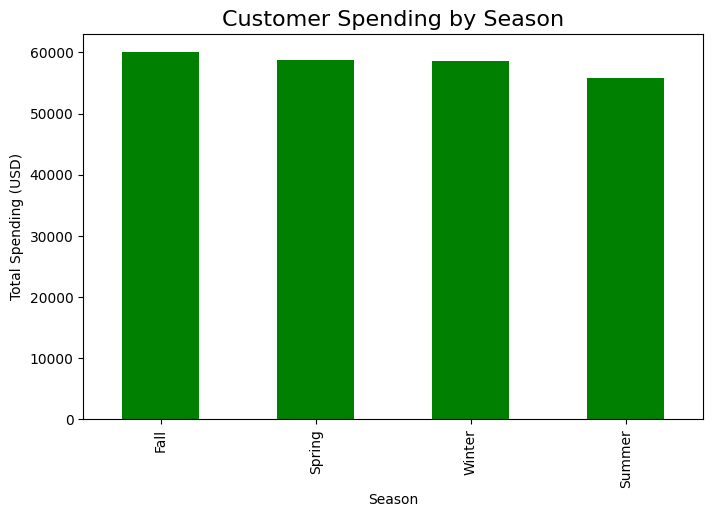

In [16]:
season_spending.plot(kind='bar', figsize=(8, 5), color='green')
plt.title("Customer Spending by Season", fontsize=16)
plt.xlabel("Season")
plt.ylabel("Total Spending (USD)")
plt.show()

# 6. Average Rating by Product Category

In [17]:
avg_rating_category = df.groupby('Category')['Review Rating'].mean().sort_values(ascending=False)
print("Average Rating by Product Category:")
print(avg_rating_category)

Average Rating by Product Category:
Category
Footwear       3.790651
Accessories    3.768629
Outerwear      3.746914
Clothing       3.723143
Name: Review Rating, dtype: float64


# Visualize Average Rating by Category

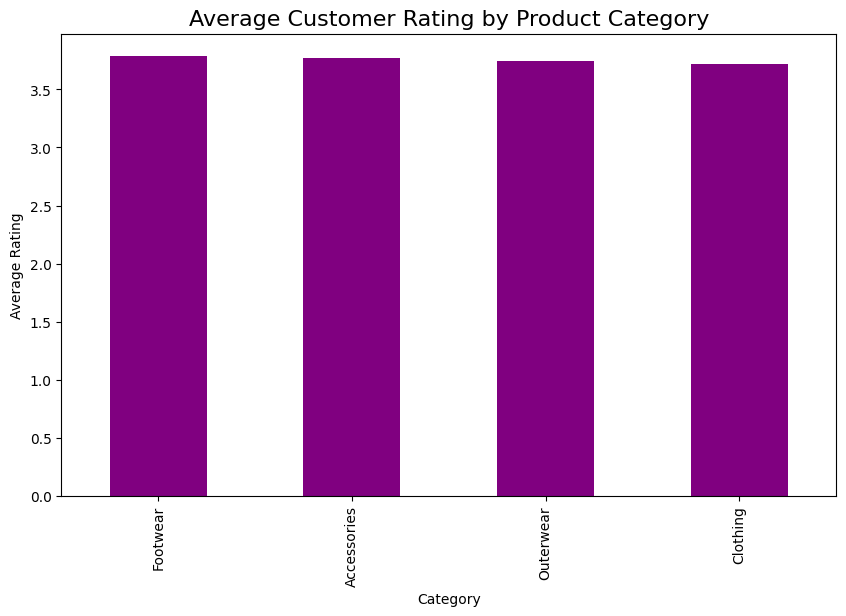

In [18]:
avg_rating_category.plot(kind='bar', figsize=(10, 6), color='purple')
plt.title("Average Customer Rating by Product Category", fontsize=16)
plt.xlabel("Category")
plt.ylabel("Average Rating")
plt.show()

# 7. Purchase Behavior: Subscribed vs Non-Subscribed Customers

In [19]:
subscription_behavior = df.groupby('Subscription Status')['Purchase Amount (USD)'].mean()
print("Average Purchase Amount: Subscribed vs Non-Subscribed Customers")
print(subscription_behavior)

Average Purchase Amount: Subscribed vs Non-Subscribed Customers
Subscription Status
No     59.865121
Yes    59.491928
Name: Purchase Amount (USD), dtype: float64


# Visualize Purchase Behavior: Subscribed vs Non-Subscribed

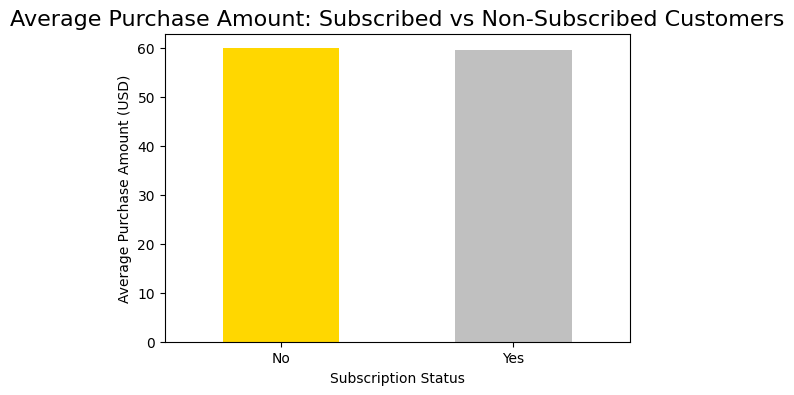

In [20]:
subscription_behavior.plot(kind='bar', figsize=(6, 4), color=['gold', 'silver'])
plt.title("Average Purchase Amount: Subscribed vs Non-Subscribed Customers", fontsize=16)
plt.xlabel("Subscription Status")
plt.ylabel("Average Purchase Amount (USD)")
plt.xticks(rotation=0)
plt.show()

# 8. Most Popular Payment Method

In [21]:
popular_payment_method = df['Payment Method'].value_counts()
print("Most Popular Payment Methods:")
print(popular_payment_method)

Most Popular Payment Methods:
Payment Method
PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: count, dtype: int64


# Visualize Most Popular Payment Method

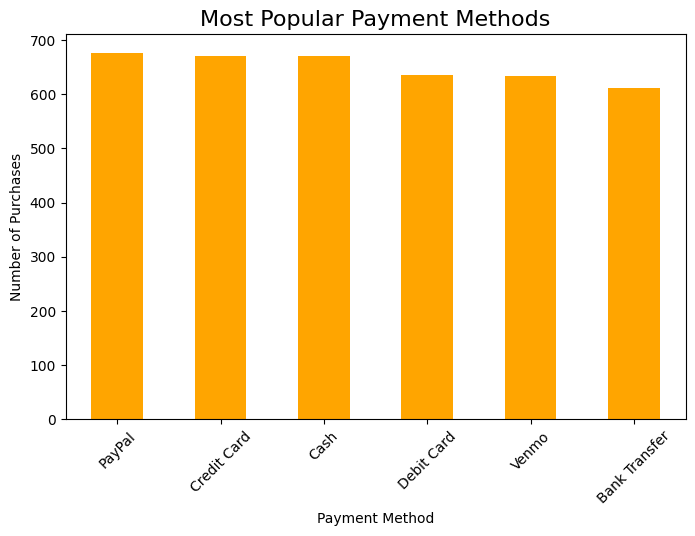

In [22]:
popular_payment_method.plot(kind='bar', figsize=(8, 5), color='orange')
plt.title("Most Popular Payment Methods", fontsize=16)
plt.xlabel("Payment Method")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=45)
plt.show()

# 9. Spending Behavior: Promo Codes vs No Promo Codes

In [23]:
promo_spending = df.groupby('Promo Code Used')['Purchase Amount (USD)'].mean()
print("Average Purchase Amount: Promo Code Used vs Not Used")
print(promo_spending)

Average Purchase Amount: Promo Code Used vs Not Used
Promo Code Used
No     60.130454
Yes    59.279070
Name: Purchase Amount (USD), dtype: float64


# Visualize Spending Behavior: Promo Codes

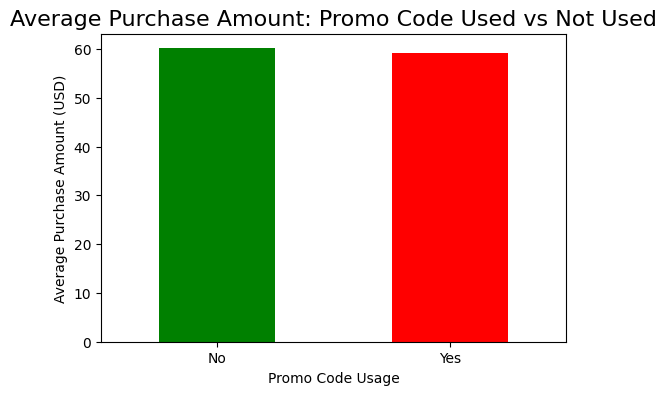

In [24]:
promo_spending.plot(kind='bar', figsize=(6, 4), color=['green', 'red'])
plt.title("Average Purchase Amount: Promo Code Used vs Not Used", fontsize=16)
plt.xlabel("Promo Code Usage")
plt.ylabel("Average Purchase Amount (USD)")
plt.xticks(rotation=0)
plt.show()

# 10. Frequency of Purchases by Age Group


In [28]:
# Map frequency of purchases to numerical values
frequency_mapping = {
    "Annually": 1,
    "Monthly": 12,
    "Fortnightly": 24,
    "Weekly": 52,
    "Daily": 365
}
df["Frequency Numeric"] = df["Frequency of Purchases"].map(frequency_mapping)

# Group by Age Group and calculate the average frequency
age_group_frequency = df.groupby("Age Group")["Frequency Numeric"].mean()

# Display results
print("Frequency of Purchases by Age Group:")
print(age_group_frequency)


Frequency of Purchases by Age Group:
Age Group
<18      22.277778
18-25    20.581560
26-35    22.583960
36-45    21.755149
46-60    22.147799
60+      21.716346
Name: Frequency Numeric, dtype: float64


<ipython-input-28-06020e0c4742>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_frequency = df.groupby("Age Group")["Frequency Numeric"].mean()


# Visualize Frequency of Purchases by Age Group

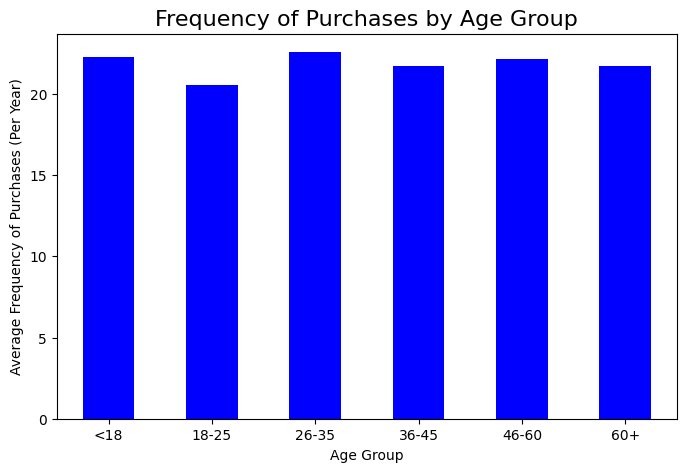

In [29]:
age_group_frequency.plot(kind="bar", color="blue", figsize=(8, 5))
plt.title("Frequency of Purchases by Age Group", fontsize=16)
plt.xlabel("Age Group")
plt.ylabel("Average Frequency of Purchases (Per Year)")
plt.xticks(rotation=0)
plt.show()

# 11: Correlation between Size and Purchase Amount

In [30]:
size_mapping = {"S": 1, "M": 2, "L": 3}
df["Size Numeric"] = df["Size"].map(size_mapping)
correlation = df["Size Numeric"].corr(df["Purchase Amount (USD)"])
print(f"Correlation between product size and purchase amount: {correlation:.2f}")


Correlation between product size and purchase amount: -0.04


# 12: Preferred shipping type by category

In [31]:
shipping_preference = df.groupby("Category")["Shipping Type"].agg(pd.Series.mode)
print("\nPreferred shipping type by category:")
print(shipping_preference)


Preferred shipping type by category:
Category
Accessories     Store Pickup
Clothing            Standard
Footwear       Free Shipping
Outerwear      Free Shipping
Name: Shipping Type, dtype: object


#  13: Impact of discounts on purchase decisions

In [33]:
discounted_purchases = df["Discount Applied"].value_counts(normalize=True) * 100
print("\nPercentage of purchases with discounts:")
print(discounted_purchases)


Percentage of purchases with discounts:
Discount Applied
No     57.0
Yes    43.0
Name: proportion, dtype: float64


# Question 14: Popular colors

In [34]:

popular_colors = df["Color"].value_counts()
print("\nPopular colors among customers:")
print(popular_colors)


Popular colors among customers:
Color
Olive        177
Yellow       174
Silver       173
Teal         172
Green        169
Black        167
Cyan         166
Violet       166
Gray         159
Maroon       158
Orange       154
Charcoal     153
Pink         153
Magenta      152
Blue         152
Purple       151
Peach        149
Red          148
Beige        147
Indigo       147
Lavender     147
Turquoise    145
White        142
Brown        141
Gold         138
Name: count, dtype: int64


# Question 15: Average number of previous purchases

In [35]:
average_previous_purchases = df["Previous Purchases"].mean()
print(f"\nAverage number of previous purchases made by customers: {average_previous_purchases:.2f}")


Average number of previous purchases made by customers: 25.35


# Visualizations

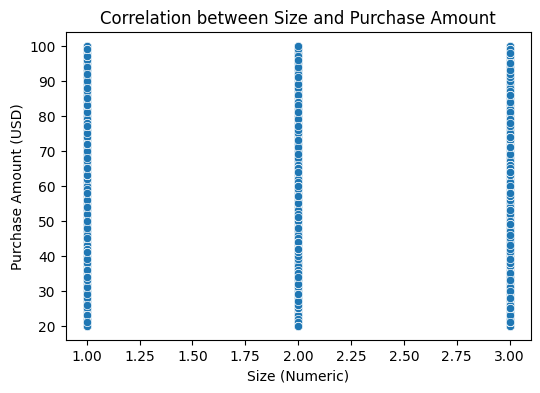

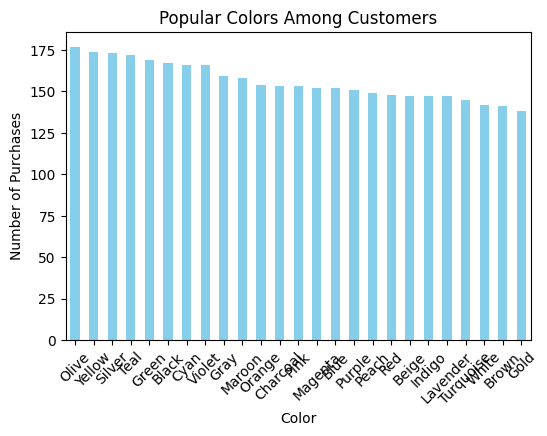

In [36]:
# Correlation Plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df["Size Numeric"], y=df["Purchase Amount (USD)"])
plt.title("Correlation between Size and Purchase Amount")
plt.xlabel("Size (Numeric)")
plt.ylabel("Purchase Amount (USD)")
plt.show()

# Popular Colors Bar Chart
plt.figure(figsize=(6, 4))
popular_colors.plot(kind="bar", color="skyblue")
plt.title("Popular Colors Among Customers")
plt.xlabel("Color")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=45)
plt.show()

# Question 16: Purchase amount vs. Review ratings

In [37]:
average_purchase_by_rating = df.groupby("Review Rating")["Purchase Amount (USD)"].mean()
print("\nAverage purchase amount by review rating:")
print(average_purchase_by_rating)


Average purchase amount by review rating:
Review Rating
2.5    62.287879
2.6    59.566038
2.7    59.363636
2.8    57.066176
2.9    56.470588
3.0    60.728395
3.1    58.770701
3.2    61.315789
3.3    59.861842
3.4    59.005495
3.5    58.833333
3.6    57.322148
3.7    58.974359
3.8    60.873239
3.9    58.926380
4.0    59.237569
4.1    61.959459
4.2    60.853801
4.3    59.673469
4.4    60.525316
4.5    59.489209
4.6    57.683908
4.7    59.283784
4.8    61.881944
4.9    63.885542
5.0    64.352941
Name: Purchase Amount (USD), dtype: float64


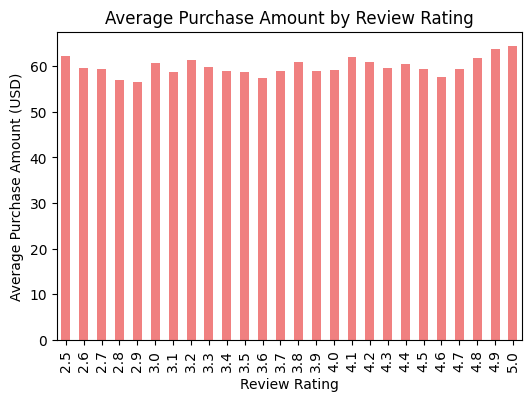

In [38]:
# Visualization: Purchase Amount vs. Review Ratings
plt.figure(figsize=(6, 4))
average_purchase_by_rating.plot(kind="bar", color="lightcoral")
plt.title("Average Purchase Amount by Review Rating")
plt.xlabel("Review Rating")
plt.ylabel("Average Purchase Amount (USD)")
plt.show()


# Question 17: Differences in purchase behavior by location


Average purchase amount by location:
Location
Alabama           59.112360
Alaska            67.597222
Arizona           66.553846
Arkansas          61.113924
California        59.000000
Colorado          56.293333
Connecticut       54.179487
Delaware          55.325581
Florida           55.852941
Georgia           58.797468
Hawaii            57.723077
Idaho             60.075269
Illinois          61.054348
Indiana           58.924051
Iowa              60.884058
Kansas            54.555556
Kentucky          55.721519
Louisiana         57.714286
Maine             56.987013
Maryland          55.755814
Massachusetts     60.888889
Michigan          62.095890
Minnesota         56.556818
Mississippi       61.037500
Missouri          57.913580
Montana           60.250000
Nebraska          59.448276
Nevada            63.379310
New Hampshire     59.422535
New Jersey        56.746269
New Mexico        61.901235
New York          60.425287
North Carolina    60.794872
North Dakota      62.891566
O

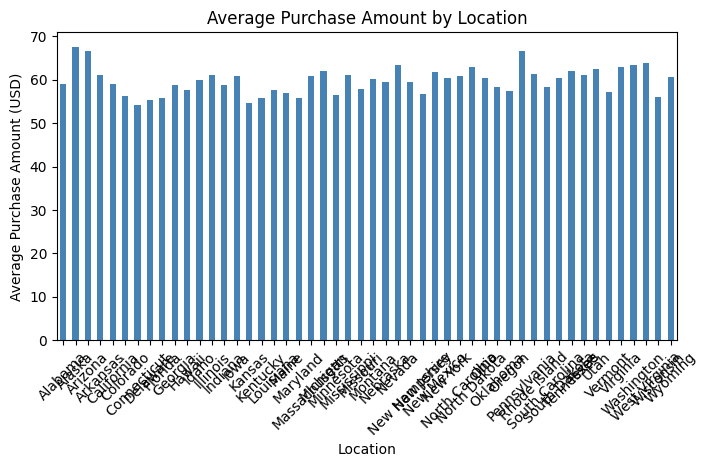

In [39]:
purchase_behavior_by_location = df.groupby("Location")["Purchase Amount (USD)"].mean()
print("\nAverage purchase amount by location:")
print(purchase_behavior_by_location)

# Visualization: Purchase Behavior by Location
plt.figure(figsize=(8, 4))
purchase_behavior_by_location.plot(kind="bar", color="steelblue")
plt.title("Average Purchase Amount by Location")
plt.xlabel("Location")
plt.ylabel("Average Purchase Amount (USD)")
plt.xticks(rotation=45)
plt.show()


# Question 18: Relationship between Age and Product Category


Average age of customers by product category:
Category
Accessories    44.224194
Clothing       43.782959
Footwear       44.442404
Outerwear      44.311728
Name: Age, dtype: float64


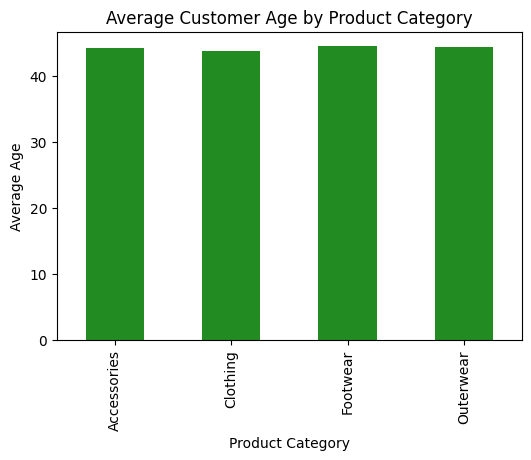

In [40]:
age_category_distribution = df.groupby("Category")["Age"].mean()
print("\nAverage age of customers by product category:")
print(age_category_distribution)

# Visualization: Age vs. Product Category
plt.figure(figsize=(6, 4))
age_category_distribution.plot(kind="bar", color="forestgreen")
plt.title("Average Customer Age by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Average Age")
plt.show()


# Question 19: Purchase amount by gender


Average purchase amount by gender:
Gender
Female    60.249199
Male      59.536199
Name: Purchase Amount (USD), dtype: float64


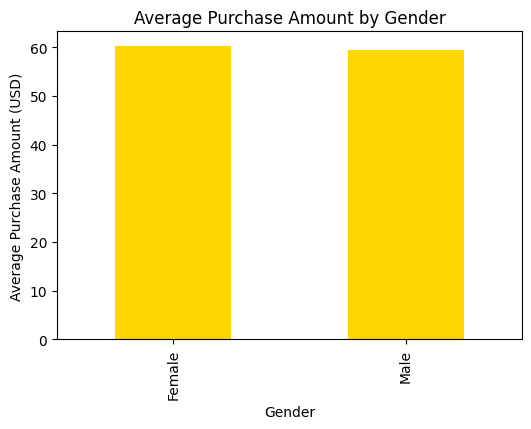

In [41]:
average_purchase_by_gender = df.groupby("Gender")["Purchase Amount (USD)"].mean()
print("\nAverage purchase amount by gender:")
print(average_purchase_by_gender)

# Visualization: Purchase Amount by Gender
plt.figure(figsize=(6, 4))
average_purchase_by_gender.plot(kind="bar", color="gold")
plt.title("Average Purchase Amount by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Purchase Amount (USD)")
plt.show()